In [1]:
import torch
import numpy as np

In [2]:
!nvidia-smi

Fri Feb 28 10:27:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
torch.cuda.is_available()

True

Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [4]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Na poodstawie tablic numpy

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

3. Na podstawie innych tensorów

In [6]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9998, 0.2694],
        [0.6390, 0.5525]]) 



4. Z losowymi lub stałymi wartościami

In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.3704, 0.0694, 0.9819],
        [0.6343, 0.4868, 0.6711]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium

#### Standardowe indeksowanie i slicing

In [9]:
tensor = torch.rand(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([0.5841, 0.1029, 0.5574, 0.9322])
First column:  tensor([0.5841, 0.4673, 0.2015, 0.8851])
Last column: tensor([0.9322, 0.4187, 0.2134, 0.2553])
tensor([[0.5841, 0.0000, 0.5574, 0.9322],
        [0.4673, 0.0000, 0.6890, 0.4187],
        [0.2015, 0.0000, 0.7265, 0.2134],
        [0.8851, 0.0000, 0.2695, 0.2553]])


#### Transponowanie tensorów

In [10]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 3.],
        [0., 0., 0., 3.],
        [2., 2., 2., 3.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [11]:
tensor = torch.arange(10)
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

# Referencja do tensora
tensor4 = tensor.view(5,2)
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor shape:torch.Size([10])

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
Tensor shape:torch.Size([1, 10])

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
Tensor shape:torch.Size([10, 1])

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
Tensor shape:torch.Size([5, 2])



#### Łączenie tensorów

In [12]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3.]])


In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.]])


In [14]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]],

        [[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]],

        [[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]]])


In [15]:
tensor = torch.rand(5,4)
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 5, 4])
torch.Size([5, 3, 4])
torch.Size([5, 4, 3])


In [16]:
try:
    t1 = torch.stack([tensor, tensor, tensor],dim=3)
    print(t1.shape)
except Exception as e:
    print(e)

Dimension out of range (expected to be in range of [-3, 2], but got 3)


#### Operacje arytmetyczne

In [17]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3

print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 2., 1.],
        [1., 0., 2., 1.],
        [1., 0., 2., 1.],
        [3., 3., 3., 3.]])
tensor([[3., 2., 4., 3.],
        [3., 2., 4., 3.],
        [3., 2., 4., 3.],
        [5., 5., 5., 5.]])
tensor([[ 5.,  0., 10.,  5.],
        [ 5.,  0., 10.,  5.],
        [ 5.,  0., 10.,  5.],
        [15., 15., 15., 15.]])


#### Operacje na elementach

In [18]:
tensor * tensor

tensor([[1., 0., 4., 1.],
        [1., 0., 4., 1.],
        [1., 0., 4., 1.],
        [9., 9., 9., 9.]])

In [19]:
tensor + tensor

tensor([[2., 0., 4., 2.],
        [2., 0., 4., 2.],
        [2., 0., 4., 2.],
        [6., 6., 6., 6.]])

In [20]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[5.4798e+00, 4.8737e+00, 5.6617e+00, 2.3829e+00],
        [5.9192e+00, 6.3174e+00, 5.0324e-03, 7.8698e+00],
        [1.2391e+00, 9.5815e+00, 9.5574e+00, 3.7631e+00],
        [6.2774e+00, 4.4524e+00, 6.3254e+00, 2.5198e+00]])
tensor([[5.4798e+00,        inf, 2.8308e+00, 2.3829e+00],
        [5.9192e+00,        inf, 2.5162e-03, 7.8698e+00],
        [1.2391e+00,        inf, 4.7787e+00, 3.7631e+00],
        [2.0925e+00, 1.4841e+00, 2.1085e+00, 8.3994e-01]])


In [21]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor // tensor)
print((tensor / tensor).type())

tensor([[4., inf, 4., 1.],
        [3., inf, 3., 4.],
        [5., inf, 4., 8.],
        [1., 0., 1., 1.]])
torch.FloatTensor


### Mini zadanie na plusa, mozna wysłać po zajęciach

In [22]:
def get_shape(given_number: int) -> tuple[int]:

    values = torch.arange(1, given_number + 1)

    row_candidates = values[given_number % values == 0] # all divisors without the given number
    column_candidates = given_number // row_candidates

    differences = torch.abs(row_candidates - column_candidates)

    best_index = torch.argmin(differences)

    return row_candidates[best_index].item(), column_candidates[best_index].item()



def create_2d_tensor(given_number: int) -> torch.Tensor:

    row, column = get_shape(given_number)

    return torch.arange(1, given_number + 1).view(row, column)

# Example
numbers = [6, 11, 15, 64]
for number in numbers:
    tensor = create_2d_tensor(number)
    print(f"Dimension : {tensor.dim()}")
    print("Shape : " ,tensor.shape)
    print(tensor)
    print("\n")

Dimension : 2
Shape :  torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


Dimension : 2
Shape :  torch.Size([1, 11])
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])


Dimension : 2
Shape :  torch.Size([3, 5])
tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]])


Dimension : 2
Shape :  torch.Size([8, 8])
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30, 31, 32],
        [33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48],
        [49, 50, 51, 52, 53, 54, 55, 56],
        [57, 58, 59, 60, 61, 62, 63, 64]])




Stwórz macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Nie uzywaj pętli.

Hint: https://pytorch.org/docs/stable/torch.html

### Operacje macierzowe

In [23]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [24]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Zaawansowany przykład - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [25]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [26]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [27]:
X = X.T.float()
X

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [28]:
theta = torch.inverse((X.T@X))@X.T@Y
theta

tensor([3.0065, 1.9963])

In [29]:
predicted_values = X @ theta
error = predicted_values - torch.tensor(prices)

print(f"Predicted values: {predicted_values}")
print(f"Real values: {prices}")
print(f"Erorr : {error}")

Predicted values: tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])
Real values: [11.97, 28.05, 38.98, 10.96, 41.1]
Erorr : tensor([ 0.0320, -0.0533,  0.0326,  0.0559, -0.0190])


# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [30]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [31]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [32]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [33]:
y = x @ x.T
y

<ipython-input-33-5548e59b0cee>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  y = x @ x.T


tensor(5., grad_fn=<DotBackward0>)

In [34]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [35]:
y.grad_fn.next_functions[0][0]

In [36]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [37]:
z = y * y * 3

In [38]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [39]:
!pip install torchviz
from torchviz import make_dot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

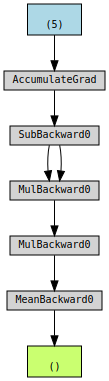

In [40]:
make_dot(a)

### Gradienty

In [41]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

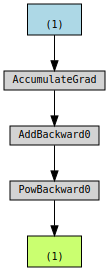

In [42]:
make_dot(y)

In [43]:
y.backward()
x.grad

tensor([75.])

#### Obliczenia z pominięciem gradientów

In [44]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

tensor([[1.1378, 1.7055, 1.7200],
        [1.1574, 1.0281, 0.9959],
        [0.9488, 1.2208, 1.4009]])
tensor([[1.1378, 1.7055, 1.7200],
        [1.1574, 1.0281, 0.9959],
        [0.9488, 1.2208, 1.4009]], grad_fn=<MmBackward0>)


#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [45]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [46]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [47]:
z = torch.matmul(x, w)+b

In [48]:
loss = torch.abs((z-y)).mean()
loss

tensor(1.1474, grad_fn=<MeanBackward0>)

In [49]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-0.3333, -0.3333, -0.3333],
        [-0.3333, -0.3333, -0.3333],
        [-0.3333, -0.3333, -0.3333],
        [-0.3333, -0.3333, -0.3333],
        [-0.3333, -0.3333, -0.3333]])
tensor([-0.3333, -0.3333, -0.3333])


# Regresja raz jeszcze

In [50]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [51]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [52]:
params = torch.rand(2,requires_grad=True)

In [53]:
y_pred = X@params
y_pred

tensor([1.9649, 4.7801, 6.2393, 1.4592, 4.9060], grad_fn=<MvBackward0>)

In [54]:
loss = (torch.square(Y-y_pred)).mean()
loss

tensor(622.7637, grad_fn=<MeanBackward0>)

In [55]:
loss.backward()

In [56]:
params.grad

tensor([-336.5199, -222.6143])

In [57]:
lr = 0.001

In [58]:
print(params)
params - lr *params.grad

tensor([0.3447, 0.4252], requires_grad=True)


tensor([0.6812, 0.6478], grad_fn=<SubBackward0>)

In [59]:
params = torch.rand(2,requires_grad=True)

In [60]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad)
    print(params)
    print(params.grad)
    params.grad.zero_()

tensor([1.1638, 0.5466], requires_grad=True)
tensor([-287.8326, -202.8253])
tensor([1.4137, 0.7233], requires_grad=True)
tensor([-249.9025, -176.6985])
tensor([1.6307, 0.8773], requires_grad=True)
tensor([-216.9427, -153.9771])
tensor([1.8190, 1.0115], requires_grad=True)
tensor([-188.3026, -134.2159])
tensor([1.9824, 1.1286], requires_grad=True)
tensor([-163.4170, -117.0283])
tensor([2.1242, 1.2306], requires_grad=True)
tensor([-141.7945, -102.0778])
tensor([2.2472, 1.3197], requires_grad=True)
tensor([-123.0079,  -89.0722])
tensor([2.3539, 1.3975], requires_grad=True)
tensor([-106.6862,  -77.7573])
tensor([2.4464, 1.4654], requires_grad=True)
tensor([-92.5065, -67.9123])
tensor([2.5266, 1.5247], requires_grad=True)
tensor([-80.1886, -59.3453])
tensor([2.5961, 1.5766], requires_grad=True)
tensor([-69.4886, -51.8893])
tensor([2.6563, 1.6220], requires_grad=True)
tensor([-60.1947, -45.3994])
tensor([2.7084, 1.6618], requires_grad=True)
tensor([-52.1228, -39.7493])
tensor([2.7535, 1.6966

### Mini zadanie na plusa, mozna wyslać po zajęciach.
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [131]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [132]:
Y = torch.tensor(prices)

bag = torch.ones_like(Y) # vecotr which contains only values 1 to represent constant price of bag
X = torch.tensor([potatoes_kg_ordered, tomatoes_kg_ordered, bag])
X = X.T.float()
Y = Y.T

print(X)
print(Y)

tensor([[ 1.,  5.,  1.],
        [ 3.,  2.,  1.],
        [ 7.,  3.,  1.],
        [ 3.,  1.,  1.],
        [10.,  2.,  1.],
        [ 6.,  3.,  1.],
        [ 8.,  6.,  1.],
        [ 4.,  7.,  1.],
        [ 3.,  3.,  1.],
        [ 1.,  2.,  1.],
        [ 2.,  3.,  1.],
        [ 0.,  1.,  1.]])
tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


In [152]:
params = torch.rand(3,requires_grad=True) # we need 3 different weights -> for potatoes, tomatoes and the bag

epochs = 1000
lr = 0.02

for epoch in range(epochs):
  y_predicted = X @ params

  loss_functions = (torch.square(Y-y_predicted)).mean()

  loss_functions.backward()

  with torch.no_grad():
      params.copy_(params - lr *params.grad)
      params.grad.zero_()


  if epoch % 50 == 0:
    print(f"Epoch :{epoch} -- Loss : {loss_functions}")

potato_price = params[0].item()
tomato_price = params[1].item()
bag_price = params[2].item()

print("\n", "VALUES FOUND BY MODEL", "\n")

print(f"Potato price : {potato_price:.4f}")
print(f"Tomato price : {tomato_price:.4f}")
print(f'Bag price : {bag_price:.4f}')


final_prices = torch.tensor(potato_price) * X[:,0] + torch.tensor(tomato_price) * X[:,1] + torch.tensor(bag_price)

print(f"Calculated prices : {final_prices}")

differences = final_prices - Y
print(f"Price differences : {differences}")



Epoch :0 -- Loss : 430.5230407714844
Epoch :50 -- Loss : 0.10676952451467514
Epoch :100 -- Loss : 0.05131150409579277
Epoch :150 -- Loss : 0.025742819532752037
Epoch :200 -- Loss : 0.013954718597233295
Epoch :250 -- Loss : 0.008519968017935753
Epoch :300 -- Loss : 0.006014229264110327
Epoch :350 -- Loss : 0.004858996719121933
Epoch :400 -- Loss : 0.0043264273554086685
Epoch :450 -- Loss : 0.004080852493643761
Epoch :500 -- Loss : 0.003967640921473503
Epoch :550 -- Loss : 0.003915473353117704
Epoch :600 -- Loss : 0.0038913290482014418
Epoch :650 -- Loss : 0.0038802828639745712
Epoch :700 -- Loss : 0.003875170601531863
Epoch :750 -- Loss : 0.0038728329818695784
Epoch :800 -- Loss : 0.003871709108352661
Epoch :850 -- Loss : 0.003871193854138255
Epoch :900 -- Loss : 0.003871029941365123
Epoch :950 -- Loss : 0.003870895830914378

 VALUES FOUND BY MODEL 

Potato price : 2.0025
Tomato price : 3.9867
Bag price : 0.5164
Calculated prices : tensor([22.4525, 14.4973, 26.4939, 10.5105, 28.5145, 24

#### Końcowy wynik:

In [63]:
#GT Rozwiazanie - jak je znaleźć?
np.array(potatoes_kg_ordered)*2 + np.array(tomatoes_kg_ordered)*4 + 0.5

array([22.5, 14.5, 26.5, 10.5, 28.5, 24.5, 40.5, 36.5, 18.5, 10.5, 16.5,
        4.5])

# LAB 2 - Tworzenie architektury i przygotowanie danych

In [64]:
import torch
import numpy as np
import time
import math
import matplotlib.pyplot as plt

## GPU

Jednym z kluczowych udogodnień pytorcha jest możliwość szybkiego i prostego przenoszenia obliczeń między CPU a GPU

In [65]:
torch.cuda.is_available()

True

In [66]:
device = torch.device("cuda")
device

device(type='cuda')

In [67]:
x = torch.zeros(2, 3)
print("X", x)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])
X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


#### Co nam to daje?

In [68]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
# The first operation on a CUDA device can be slow as it has to establish a CPU-GPU communication first.
# Hence, we run an arbitrary command first without timing it for a fair comparison.
_ = torch.matmul(x*0.0, x)
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"GPU time: {(end_time - start_time):6.5f}s")

CPU time: 4.04132s
GPU time: 0.00031s


#### Ciąg komend do zapisania
Losowość jest bardzo ważnym elementem trenowania sieci neuronowych (o czym się wkrótce przekonamy). Eksperymentując, chcielibyśmy jednak żeby przy każdym uruchomieniu programu, wynik był taki sam. Tylko w takim przypadku jesteśmy w stanie coś wnioskować. Do zapewnienia możliwości reprodukcji wyników na GPU za pomocą pytorcha służa poniższe komendy:

In [69]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

## Tworzenie modeli
Tworzymy tensory z parametrami, wagi i biasy, obliczamy gradienty, aktualizujemy parametry itd.
lub
wykorzystujemy torch.nn

W torch.nn możemy znaleźć wiele przydatnych predefiniowanych klas jak wagi sieci, funkcje aktywacji, funkcje straty, optymalizacja itp. Jeszcze raz, dokumentacja jest fajna: https://pytorch.org/docs/stable/nn.html

In [2]:
import torch.nn as nn

Dodatkowo, funkcje wykorzystywane w budowaniu sieci znajdują się w module torch.nn.functionl

In [4]:
import torch.nn.functional as F

### nn.Module
W PyTorchu, sieci neuronowe są zbudowane z modułów - obiektów klas dziedziczących po klasie nn.Module. Moduły mogą składać się z innych modułów, a sieć neuronowa w całości też zazwyczaj jest modułem.

Podstawowy template dla modułu wygląda następująco

In [72]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

W konstruktorze modułu zazwyczaj inicjowane są wszystkie parametry, lub wewnętrzne moduły (np. warstwy sieci)

W funkcji forward zapisane są wszystkie obliczenia które są wykonywane kiedy wywołujemy dany moduł. Przykładowo: (nn = MyModule(); nn(x)).

Kalkulacja wstecz (backwards) jest tworzona automatycznie, ale w razie potrzeby można ją też nadpisywać

# Stwórzmy pierwsza sieć neuronową

In [73]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
#         self.linear3 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
#         x = self.act_fn(x)
#         x = self.linear3(x)
        return x

Wypisywanie zawartości modelu

In [74]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
model.cuda()
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [75]:
x = torch.Tensor(2).cuda()

In [76]:
model.forward(x)
model(x)

tensor([0.8566], device='cuda:0', grad_fn=<ViewBackward0>)

Co tak właściwie mamy w środku?

In [77]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


## Activation functions

In [78]:
act_fn_by_name = {
    "sigmoid": torch.sigmoid,
    "tanh": torch.tanh,
    "relu": F.relu,
    "leakyrelu": F.leaky_relu
}

In [79]:
def get_grads(act_fn, x):
    x = x.clone().requires_grad_() # Mark the input as tensor for which we want to store gradients
    out = act_fn(x)
    out.sum().backward() # Summing results in an equal gradient flow to each element in x
    return x.grad # Accessing the gradients of x by "x.grad"

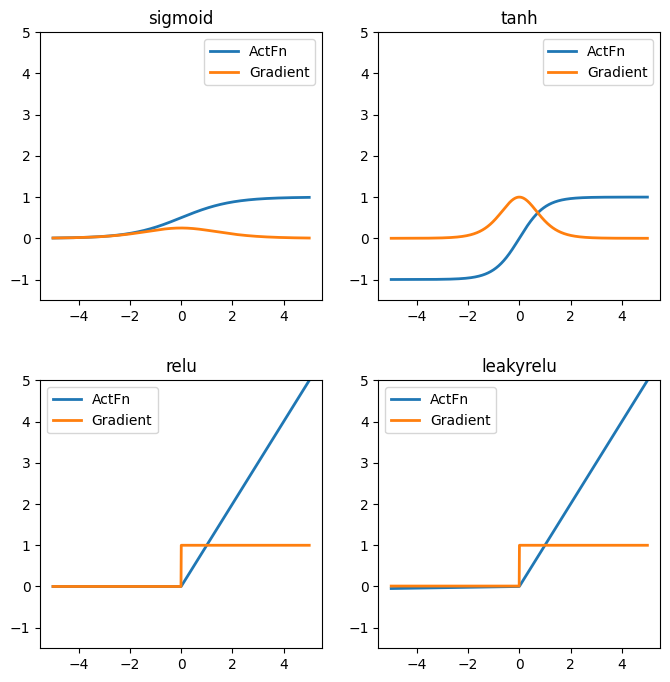

In [80]:
%matplotlib inline
def vis_act_fn(act_fn, name, ax, x):
    # Run activation function
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    # Push x, y and gradients back to cpu for plotting
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ## Plotting
    ax.plot(x, y, linewidth=2, label="ActFn")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

x = torch.linspace(-5, 5, 1000) # Range on which we want to visualize the activation functions
## Plotting
rows = math.ceil(len(act_fn_by_name)/2.0)
fig, ax = plt.subplots(rows, 2, figsize=(8, rows*4))
for i, name in enumerate(act_fn_by_name.keys()):
    vis_act_fn(act_fn_by_name[name], name, ax[divmod(i,2)], x)
fig.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

# Dane
PyTorch posiada zaimplementowanych kilka funkcjonalności które pozwalają wczytywać i manipulować danymi. Znajdują się one w pakiecie torch.utils.data

In [3]:
import torch.utils.data as data

Główną strukturą w ramach której przechowywane (lub niekoniecznie) są dane jest klasa Dataset. Stwórzmy sobie przykładowy zbiór danych - tzw. ciągły XOR. Przykład zaczerpnięty z https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html#Learning-by-example:-Continuous-XOR

In [82]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [83]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9957, 0.0045]), tensor(1))


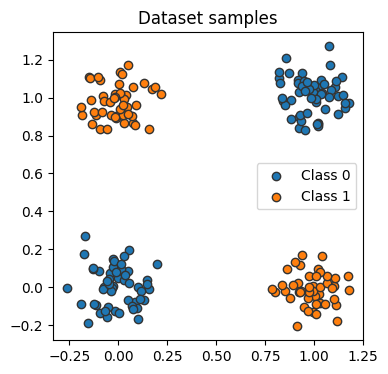

In [84]:
examples = dataset.data
labels = dataset.label
data_0 = examples[labels == 0]
data_1 = examples[labels == 1]

plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.title("Dataset samples")
plt.legend()
plt.show()

## Data loaders (Ładowacze danych?!)

In [85]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [86]:
next(iter(data_loader))

[tensor([[ 9.7303e-01, -4.9531e-04],
         [ 1.9016e-01,  1.0542e+00],
         [-3.3372e-02, -3.4361e-03],
         [ 1.0088e+00, -1.4051e-01],
         [ 9.7409e-01,  1.0447e+00],
         [ 9.3978e-01,  1.1293e+00],
         [ 9.3089e-01,  1.1767e-01],
         [-1.1391e-01, -9.4558e-02]]),
 tensor([1, 1, 0, 1, 0, 0, 1, 0])]

In [87]:
len(data_loader)

25

In [88]:
next(iter(data_loader))[0].shape[0]*len(data_loader)

200

In [89]:
data_loader_2 = data.DataLoader(dataset, batch_size=7, shuffle=True)
next(iter(data_loader_2))[0].shape[0]*len(data_loader_2)

203

In [90]:
list(iter(data_loader_2))[-1]

[tensor([[ 0.1334, -0.0675],
         [ 0.9741,  1.0447],
         [ 0.9529,  1.0358],
         [ 1.1003, -0.0612]]),
 tensor([0, 0, 0, 1])]

#### Drop last
Parametr powodujący pominięcie ostatniego wsadu (batch)

In [91]:
data_loader_2 = data.DataLoader(dataset,batch_size=7, shuffle=True, drop_last=True)
next(iter(data_loader_2))[0].shape[0]*len(data_loader_2)

196

## Funkcje straty
Na poprzednich zajęciach obliczaliśmy funkcję straty ręcznie wykonując operacje na tensorach. Jest to w pełni poprawne rozwiązanie, ale możemy też nie wymyślać koła na nowo, ale wykorzystać wbudowane moduły. Pełna lista dostępna tutaj: https://pytorch.org/docs/stable/nn.html#loss-functions

In [92]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
tensor_1 = torch.arange(5)
tensor_2 = torch.ones(5)
print(tensor_1, tensor_2)

tensor([0, 1, 2, 3, 4]) tensor([1., 1., 1., 1., 1.])


### Błąd średniokwadratowy (Mean Squared Error) lub L2Loss

In [94]:
loss = nn.MSELoss()
loss(tensor_1,tensor_2)

tensor(3.)

$ \quad l_{n}=\left(x_{n}-y_{n}\right)^{2}$

In [95]:
loss = nn.MSELoss(reduction="none")
print(f"No reduction: {loss(tensor_1,tensor_2)}")
loss = nn.MSELoss(reduction="mean")
print(f"Mean: {loss(tensor_1,tensor_2)}")
loss = nn.MSELoss(reduction="sum")
print(f"Sum: {loss(tensor_1,tensor_2)}")

No reduction: tensor([1., 0., 1., 4., 9.])
Mean: 3.0
Sum: 15.0


In [96]:
F.mse_loss(tensor_1, tensor_2)

tensor(3.)

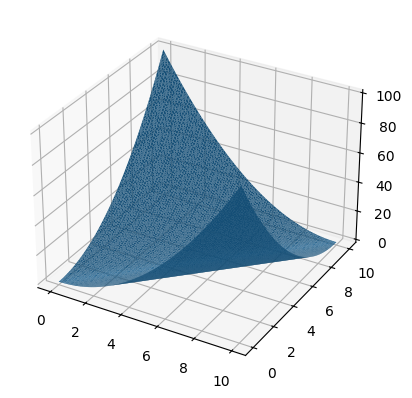

In [97]:
loss = nn.MSELoss(reduction="none")
x, y = torch.meshgrid(torch.linspace(0,10,100),torch.linspace(0,10,100), indexing='ij')
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)

plt.show()

### Błąd bezwzględny (Mean absolute Error) lub L1Loss

$ \quad l_{n}=\left|x_{n}-y_{n}\right|$

In [98]:
print(tensor_1, tensor_2)
loss = nn.L1Loss()
loss(tensor_1,tensor_2)

tensor([0, 1, 2, 3, 4]) tensor([1., 1., 1., 1., 1.])


tensor(1.4000)

In [99]:
loss = nn.L1Loss(reduction="none")
print(f"No reduction: {loss(tensor_1,tensor_2)}")
loss = nn.L1Loss(reduction="mean")
print(f"Mean: {loss(tensor_1,tensor_2)}")
loss = nn.L1Loss(reduction="sum")
print(f"Sum: {loss(tensor_1,tensor_2)}")

No reduction: tensor([1., 0., 1., 2., 3.])
Mean: 1.399999976158142
Sum: 7.0


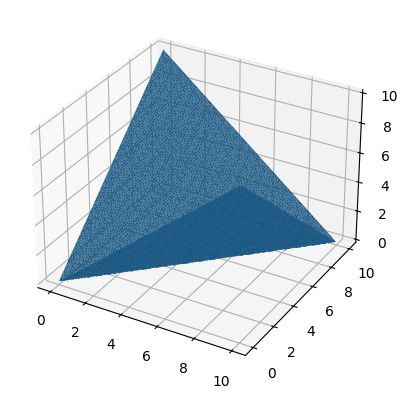

In [100]:
loss = nn.L1Loss(reduction="none")
x, y = torch.meshgrid(torch.linspace(0,10,100),torch.linspace(0,10,100), indexing='ij')
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)

plt.show()

### Entropia krzyżowa:
$l_{n}=\left[y_{n} \cdot \log x_{n}+\left(1-y_{n}\right) \cdot \log \left(1-x_{n}\right)\right]$

In [101]:
tensor_1 = torch.rand(5)
tensor_2 = torch.ones(5)
print(tensor_1, tensor_2)
loss = nn.BCELoss(reduction="none")
loss(tensor_1,tensor_2)

tensor([0.5426, 0.8308, 0.3402, 0.9554, 0.0702]) tensor([1., 1., 1., 1., 1.])


tensor([0.6114, 0.1853, 1.0783, 0.0456, 2.6566])

In [102]:
try :
  loss(tensor_1*10,tensor_2)
except Exception as e:
  print(e)

all elements of input should be between 0 and 1


In [103]:
loss = nn.BCEWithLogitsLoss(reduction="none")
loss(tensor_1*100,tensor_2)

tensor([2.7232e-24, 8.2837e-37, 1.6866e-15, 3.2230e-42, 8.9462e-04])

/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


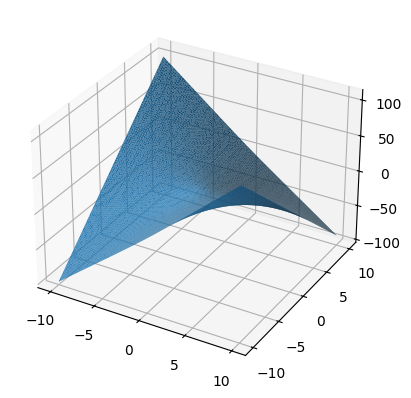

In [104]:
loss = nn.BCEWithLogitsLoss(reduction="none")
x, y = torch.meshgrid(torch.linspace(-10,10,100),torch.linspace(-10,10,100))
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
#ax = fig.gca(projection='3d') - for older matplotlib

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)

plt.show()

# Optymalizacja parametrów
W przykładowym problemie optymalizacji parametrów regresji, ręcznie aktualizowaliśmy gradienty. W torch są do tego narzędzia zwane optymalizatorami, znajdują się one w pakiecie torch.optim

Najprostszym optymalizaotrem jest algorytm stochastycznego spadku gradientu (Stochastic Gradient Descent) - SGD

In [105]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [106]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

## Połączmy to wszystko razem

In [107]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [108]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [110]:
loss_module = nn.BCEWithLogitsLoss()

In [111]:
model.train()

# Training loop
for epoch in range(100):
    for data_inputs, data_labels in train_data_loader:

        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        ## Step 2: Run the model on the input data
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        ## Step 3: Calculate the loss
        loss = loss_module(preds, data_labels.float())

        ## Step 4: Perform backpropagation
        # Before calculating the gradients, we need to ensure that they are all zero.
        # The gradients would not be overwritten, but actually added to the existing ones.
        optimizer.zero_grad()
        # Perform backpropagation
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()
    print(f"Epoch: {epoch}, loss: {loss.item():.3}")

Epoch: 0, loss: 0.767
Epoch: 1, loss: 0.732
Epoch: 2, loss: 0.709
Epoch: 3, loss: 0.681
Epoch: 4, loss: 0.671
Epoch: 5, loss: 0.686
Epoch: 6, loss: 0.687
Epoch: 7, loss: 0.68
Epoch: 8, loss: 0.683
Epoch: 9, loss: 0.678
Epoch: 10, loss: 0.677
Epoch: 11, loss: 0.676
Epoch: 12, loss: 0.676
Epoch: 13, loss: 0.673
Epoch: 14, loss: 0.671
Epoch: 15, loss: 0.666
Epoch: 16, loss: 0.662
Epoch: 17, loss: 0.659
Epoch: 18, loss: 0.663
Epoch: 19, loss: 0.659
Epoch: 20, loss: 0.656
Epoch: 21, loss: 0.654
Epoch: 22, loss: 0.646
Epoch: 23, loss: 0.632
Epoch: 24, loss: 0.63
Epoch: 25, loss: 0.626
Epoch: 26, loss: 0.623
Epoch: 27, loss: 0.62
Epoch: 28, loss: 0.607
Epoch: 29, loss: 0.597
Epoch: 30, loss: 0.593
Epoch: 31, loss: 0.587
Epoch: 32, loss: 0.565
Epoch: 33, loss: 0.566
Epoch: 34, loss: 0.566
Epoch: 35, loss: 0.561
Epoch: 36, loss: 0.541
Epoch: 37, loss: 0.537
Epoch: 38, loss: 0.528
Epoch: 39, loss: 0.499
Epoch: 40, loss: 0.477
Epoch: 41, loss: 0.469
Epoch: 42, loss: 0.458
Epoch: 43, loss: 0.443
E

### Ewaluacja

In [112]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [113]:
model.eval() # Set model to eval mode
true_preds, num_preds = 0., 0.

with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in test_data_loader:

        # Determine prediction of model on dev set
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)
        preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
        pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == data_labels).sum()
        num_preds += data_labels.shape[0]

acc = true_preds / num_preds
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Accuracy of the model: 99.80%


In [114]:
from matplotlib.colors import to_rgba

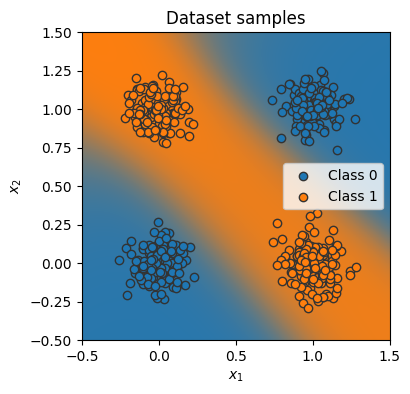

In [115]:
%matplotlib inline
with torch.no_grad():
    data = test_dataset.data.cpu().numpy()
    label = test_dataset.label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2) # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = preds * c0[None,None] + (1 - preds) * c1[None,None] # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy() # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='upper', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

## Zapisywanie i wczytywanie modelu

In [116]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 2.0937, -2.5180],
        [ 2.7403, -2.3386],
        [ 1.2440,  1.1351],
        [-0.5659, -0.0158]], device='cuda:0')), ('linear1.bias', tensor([-0.9701,  1.1750,  0.2394, -0.3408], device='cuda:0')), ('linear2.weight', tensor([[ 3.1159, -3.2822,  1.8740, -0.4111]], device='cuda:0')), ('linear2.bias', tensor([1.2004], device='cuda:0'))])


In [117]:
torch.save(state_dict, "simple_model.tar")

In [118]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("simple_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
new_model.load_state_dict(state_dict)
# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 2.0937, -2.5180],
        [ 2.7403, -2.3386],
        [ 1.2440,  1.1351],
        [-0.5659, -0.0158]], device='cuda:0')), ('linear1.bias', tensor([-0.9701,  1.1750,  0.2394, -0.3408], device='cuda:0')), ('linear2.weight', tensor([[ 3.1159, -3.2822,  1.8740, -0.4111]], device='cuda:0')), ('linear2.bias', tensor([1.2004], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 2.0937, -2.5180],
        [ 2.7403, -2.3386],
        [ 1.2440,  1.1351],
        [-0.5659, -0.0158]], device='cuda:0')), ('linear1.bias', tensor([-0.9701,  1.1750,  0.2394, -0.3408], device='cuda:0')), ('linear2.weight', tensor([[ 3.1159, -3.2822,  1.8740, -0.4111]], device='cuda:0')), ('linear2.bias', tensor([1.2004], device='cuda:0'))])


<ipython-input-118-df3df87118e4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("simple_model.tar")


## Zrób to sam. Polecane przećwiczyć przed kolejnymi ćwiczeniami.

Spróbujmy przewidzieć ocenę wina na podstawie jego parametrów

In [172]:
# Powielenie importow w celu uruchomienia tylko tych komórek
import pandas as pd
import torch
from torch import nn
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

#### Wyświetlenie dataframe'u

In [173]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [174]:
train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3699,7.6,0.30,0.37,1.60,0.087,27.0,177.0,0.99438,3.09,0.50,9.8,5
1261,7.3,0.19,0.68,1.50,0.050,31.0,156.0,0.99460,3.32,0.64,9.4,6
3483,6.1,0.36,0.26,8.15,0.035,14.0,88.0,0.99031,3.06,0.27,13.0,7
1335,5.7,0.21,0.24,2.30,0.047,60.0,189.0,0.99500,3.65,0.72,10.1,6
88,7.1,0.43,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5
1425,6.8,0.22,0.49,0.90,0.052,26.0,128.0,0.99100,3.25,0.35,11.4,6
2136,7.9,0.18,0.36,5.90,0.058,31.0,132.0,0.99500,3.25,0.52,10.9,6
2846,6.9,0.15,0.29,2.30,0.033,14.0,82.0,0.99132,3.10,0.58,11.2,7
1269,8.4,0.35,0.56,13.80,0.048,55.0,190.0,0.99930,3.07,0.58,9.4,6
3709,6.7,0.31,0.09,1.40,0.039,53.0,141.0,0.99206,3.12,0.44,10.1,5


In [175]:
test.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
17,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
18,7.4,0.34,0.42,1.10,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6
19,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5
37,7.0,0.33,0.32,1.20,0.053,38.0,138.0,0.9906,3.13,0.28,11.2,6
39,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,5
40,6.7,0.23,0.39,2.50,0.172,63.0,158.0,0.9937,3.11,0.36,9.4,6
48,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.9954,3.13,0.46,9.8,6
57,6.0,0.19,0.26,12.40,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,6
63,6.6,0.38,0.15,4.60,0.044,25.0,78.0,0.9931,3.11,0.38,10.2,6


### Normalizacja danych z datafram'u 

In [5]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()
qualities = train['quality'].values.reshape(-1, 1)
columns = train.columns[:-1]

train_copy = train.drop(columns=['quality'])
test_copy = test.drop(columns=['quality'])

train_scaled = scaler.fit_transform(train_copy)
train_scaled = np.concatenate((train_scaled, qualities), axis=1)
test_scaled = scaler.transform(test_copy)
test_scaled = np.concatenate((test_scaled, test['quality'].values.reshape(-1, 1)), axis=1)

col_qual = list(columns) + ['quality']
train_scaled = pd.DataFrame(train_scaled, columns=col_qual)
train_scaled["quality"] -= 3 # normalizacja etykiet
test_scaled = pd.DataFrame(test_scaled, columns=col_qual)
test_scaled["quality"] -= 3


In [57]:
train_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.886885,0.214642,0.303645,-0.940786,1.891277,-0.503780,0.925948,0.123742,-0.658929,0.096750,-0.583947,2.0
1,0.530677,-0.870094,2.863700,-0.960485,0.194003,-0.259077,0.425825,0.196796,0.879021,1.337264,-0.907008,3.0
2,-0.894159,0.806316,-0.604761,0.349465,-0.494081,-1.299068,-1.193618,-1.227762,-0.859531,-1.941238,2.000544,4.0
3,-1.369104,-0.672869,-0.769926,-0.802897,0.056386,1.515026,1.211732,0.329622,3.085644,2.046129,-0.341651,3.0
4,0.293204,1.496602,2.285623,1.068459,-0.035358,1.147970,0.402010,1.126578,-0.525194,-0.346291,-1.472366,2.0
5,-0.063005,-0.574257,1.294634,-1.078676,0.285748,-0.564956,-0.241004,-0.998637,0.410949,-1.232373,0.708298,3.0
6,1.243094,-0.968706,0.221063,-0.093751,0.560981,-0.259077,-0.145743,0.329622,0.410949,0.273966,0.304472,3.0
7,0.055731,-1.264543,-0.357014,-0.802897,-0.585826,-1.299068,-1.336510,-0.892376,-0.592061,0.805615,0.546768,4.0
8,1.836776,0.707703,1.872711,1.462429,0.102258,1.209146,1.235547,1.757501,-0.792663,0.805615,-0.907008,3.0
9,-0.181741,0.313254,-2.008662,-0.980183,-0.310592,1.086794,0.068595,-0.646648,-0.458327,-0.434899,-0.341651,2.0


In [58]:
test_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.480567,0.017417,0.551393,0.103234,0.194003,-0.320252,-0.979280,0.362829,0.477817,-0.434899,-0.341651,3.0
1,-0.775422,3.764686,1.212052,-1.019580,-0.769315,-0.381428,-1.503218,-1.596354,0.945888,-0.877940,1.839013,5.0
2,0.649413,0.609091,0.716557,-1.039279,-0.585826,-1.115540,0.783056,-0.766192,-0.458327,0.362574,0.627533,3.0
3,-0.419214,0.313254,-1.595750,0.221424,-0.081231,-0.075549,-0.121928,0.495655,0.210347,0.096750,-0.826243,2.0
4,0.174468,0.510479,-0.109267,-1.019580,0.331620,0.169155,-0.002851,-1.131463,-0.391459,-1.852630,0.546768,3.0
5,0.530677,-0.377032,0.468810,2.279916,0.515109,0.597387,0.259118,1.956740,0.143480,-1.143764,-1.553131,2.0
6,-0.181741,-0.475645,0.468810,-0.763500,5.790421,1.698554,0.473456,-0.102062,-0.525194,-1.143764,-0.907008,3.0
7,0.174468,0.313254,-0.604761,0.201726,1.065576,-0.442604,0.521087,0.462448,-0.391459,-0.257683,-0.583947,3.0
8,-1.012895,-0.870094,-0.604761,1.186650,0.102258,0.903266,0.211487,1.060165,0.745286,-1.143764,-1.310835,3.0
9,-0.300477,1.003540,-1.513168,-0.349832,-0.081231,-0.626132,-1.431772,-0.301301,-0.525194,-0.966548,-0.260886,3.0


### Rozkład jakości

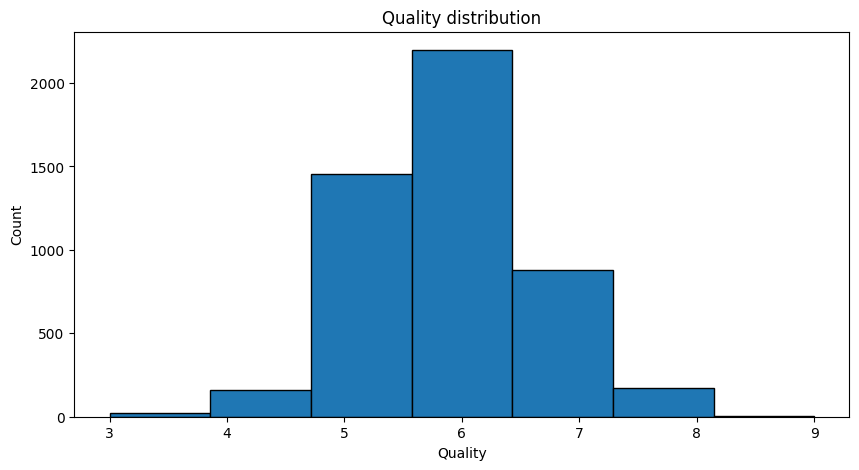

In [177]:
import matplotlib.pyplot as plt
quality_list = df["quality"].values.tolist()

plt.figure(figsize=(10,5))
plt.hist(quality_list, bins=7, edgecolor='black')
plt.title('Quality distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Prosta sieć do klasyfikacji

In [281]:
class WineClassificator(nn.Module):
  def __init__(self, input_features, output_features, hidden_features):
    super().__init__()
    self.input_features = input_features
    self.output_features = output_features
    self.hidden_features = hidden_features

    self.first_layer = nn.Linear(self.input_features, self.hidden_features)
    self.second_layer = nn.Linear(self.hidden_features, self.hidden_features)
    self.third_layer = nn.Linear(self.hidden_features, self.output_features)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)


  def forward(self, x):
    x = self.relu(self.first_layer(x))
    x = self.dropout(x)
    x = self.relu(self.second_layer(x))
    x = self.dropout(x)
    x = self.third_layer(x)
    return x




### Przygotowywanie danych jako tensory

In [147]:
import torch.utils.data as data

In [282]:
train_dataset = data.TensorDataset(
    torch.from_numpy(train_scaled.values[:, :-1]).float(),
    torch.from_numpy(train_scaled.values[:, -1]).long()
)

test_dataset = data.TensorDataset(
    torch.from_numpy(test_scaled.values[:, :-1]).float(),
    torch.from_numpy(test_scaled.values[:, -1]).long()
)

In [150]:
display(next(iter(train_dataset)))

display(next(iter(test_dataset)))


(tensor([ 0.8869,  0.2146,  0.3036, -0.9408,  1.8913, -0.5038,  0.9259,  0.1237,
         -0.6589,  0.0967, -0.5839]),
 tensor(2))

(tensor([ 1.4806,  0.0174,  0.5514,  0.1032,  0.1940, -0.3203, -0.9793,  0.3628,
          0.4778, -0.4349, -0.3417]),
 tensor(3))

### Loss Function, Model and Optimizer

In [288]:
device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_FEATURES = len(train_scaled.columns) - 1
OUTPUT_FEATURES = df['quality'].nunique()
HIDDEN_FEATURES = 100

loss_func = nn.CrossEntropyLoss()
model = WineClassificator(input_features=INPUT_FEATURES, output_features=OUTPUT_FEATURES, hidden_features=HIDDEN_FEATURES).to(device)

model_parameters = model.parameters()
optimizer = torch.optim.Adam(model_parameters, lr=0.008)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

### Podział na mini-sety

In [289]:
train_data_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

### Training Loop

In [290]:
history_loss = []

model.train()

for epoch in range(101):
    for data_inputs, data_labels in train_data_loader:

        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        preds = model(data_inputs)

        loss = loss_func(preds, data_labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    if epoch % 10 == 0 :
        print(f"Epoch: {epoch}, loss: {loss.item():.3}")
        history_loss.append(loss.item())

Epoch: 0, loss: 0.946
Epoch: 10, loss: 1.33
Epoch: 20, loss: 1.26
Epoch: 30, loss: 1.04
Epoch: 40, loss: 1.12
Epoch: 50, loss: 1.03
Epoch: 60, loss: 1.18
Epoch: 70, loss: 0.736
Epoch: 80, loss: 0.806
Epoch: 90, loss: 0.684
Epoch: 100, loss: 0.703


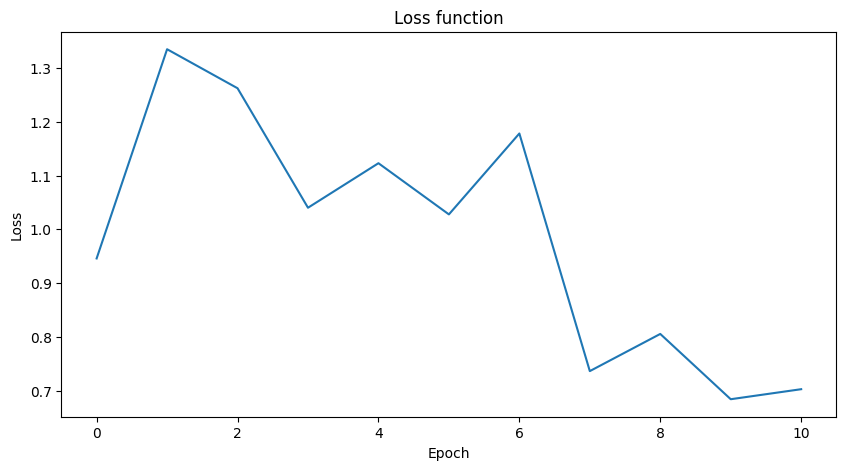

In [291]:
plt.figure(figsize=(10,5))
plt.plot(history_loss)
plt.title('Loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Evaluation

In [292]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    all_preds = []
    all_labels = []

    for data_inputs, data_labels in test_data_loader:
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        preds = model(data_inputs)
        predicted_classes = torch.argmax(preds, dim=1)
        predicted_classes = predicted_classes.cpu().numpy() + 3

        all_preds.extend(predicted_classes)
        all_labels.extend(data_labels.cpu().numpy() + 3)

print(f"Test Accuracy: {accuracy_score(all_labels, all_preds):.3f}")

Test Accuracy: 0.594


# ___